In [86]:
import pandas as pd

# read Samples
filepath = "./GEO Samples/GSE106817/Dataframe.csv"
all_samples = pd.read_csv(filepath)


# read reduced dimensions

filepath = "./GEO Samples/GSE106817/pca_top_features_file.csv"
df_pca_top_features = pd.read_csv(filepath, index_col=False)


# Select top feature columns and target column

df_pca_top_features = df_pca_top_features['0'].tolist()
df_pca_top_features.append('HasCancer')

df = all_samples[df_pca_top_features]
df

,MIMAT0004602,MIMAT0027614,MIMAT0019710,MIMAT0015064,MIMAT0003240,MIMAT0004592,MIMAT0019015,MIMAT0004508,MIMAT0005866,MIMAT0019852,...,MIMAT0028117,MIMAT0026477,MIMAT0027500,MIMAT0004951,MIMAT0004982,MIMAT0022945,MIMAT0027453,MIMAT0027665,MIMAT0003887,HasCancer
0,2.406,0.361,0.361,0.361,5.703,0.361,0.361,8.008,4.697,7.807,...,6.667,5.778,7.444,6.157,6.188,6.376,0.361,5.718,0.361,1
1,2.406,0.361,0.361,0.361,5.703,0.361,0.361,8.008,4.697,7.807,...,6.667,5.778,7.444,6.157,6.188,6.376,0.361,5.718,0.361,1
2,4.861,4.162,0.744,6.138,1.063,0.744,0.744,8.258,5.978,7.898,...,5.905,5.782,6.925,5.918,5.968,4.199,0.744,0.744,0.744,1
3,2.493,1.022,1.022,6.002,4.908,4.045,1.022,7.070,6.493,6.836,...,6.514,4.906,6.708,6.815,7.313,4.935,1.022,1.022,1.022,1
4,4.915,1.138,1.138,5.860,4.767,1.138,1.138,6.944,5.815,7.428,...,6.209,3.736,4.453,5.738,5.409,5.547,5.715,1.138,1.138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,5.489,6.529,4.994,7.951,7.328,3.079,5.656,10.316,6.223,10.373,...,8.137,7.051,8.209,7.046,7.585,3.144,4.252,4.081,3.604,0
918,6.632,6.551,4.887,7.784,6.891,3.760,4.450,9.751,6.539,9.876,...,7.977,7.226,8.443,7.439,7.555,3.410,3.540,4.283,3.112,0
919,6.757,6.051,5.253,7.826,6.957,5.104,4.703,9.323,6.163,9.552,...,7.993,7.218,8.515,7.341,7.754,2.537,2.699,3.800,3.120,0
920,6.973,6.186,5.718,8.170,7.229,5.241,4.645,9.662,6.395,9.805,...,8.261,7.062,8.476,7.667,7.825,4.175,4.087,4.237,3.042,0


In [85]:
# using KNN

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier


X = df.iloc[:, :-1]
y = df.iloc[:,[-1]]

# Create a KNN classifier with k = 25
knn = KNeighborsClassifier(n_neighbors=25)

# Use cross-validation to create test and train data
scores = cross_val_score(knn, X, y, cv=5)
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", scores.mean())


# Split the data into training and test sets with a test size of 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Fit the KNN classifier on the training data
knn.fit(X_train, y_train)

# Evaluate the KNN classifier on the test data
accuracy = knn.score(X_test, y_test)
print("Accuracy on the test set: ", accuracy)

Accuracy for each fold:  [0.91351351 0.99459459 0.94565217 0.9673913  0.96195652]
Mean accuracy:  0.9566216216216217
Accuracy on the test set:  0.964769647696477


C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

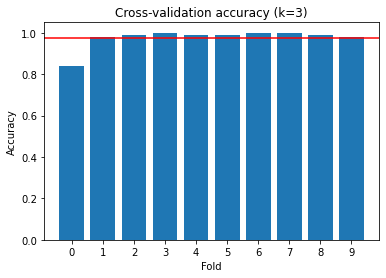

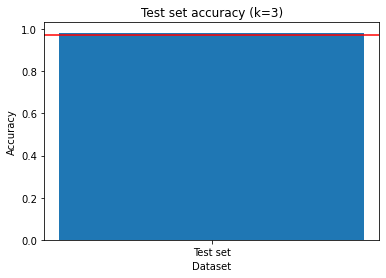

In [81]:
import matplotlib.pyplot as plt


# Plot the results
plt.bar(range(len(scores)), scores)
plt.axhline(y=scores.mean(), color='r', linestyle='-')
plt.xticks(range(len(scores)))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation accuracy (k=3)')
plt.show()

plt.bar(['Test set'], [accuracy])
plt.axhline(y=scores.mean(), color='r', linestyle='-')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Test set accuracy (k=3)')
plt.show()

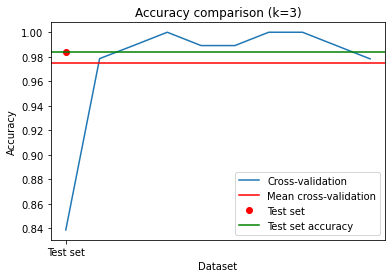

In [82]:

# Plot the results
plt.plot(range(len(scores)), scores, label='Cross-validation')
plt.axhline(y=scores.mean(), color='r', linestyle='-', label='Mean cross-validation')
plt.plot(['Test set'], [accuracy], 'ro', label='Test set')
plt.axhline(y=accuracy, color='g', linestyle='-', label='Test set accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison (k=3)')
plt.legend()
plt.show()


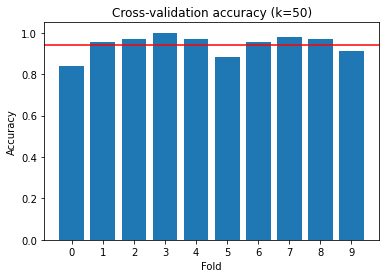

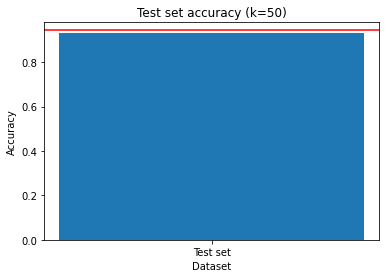

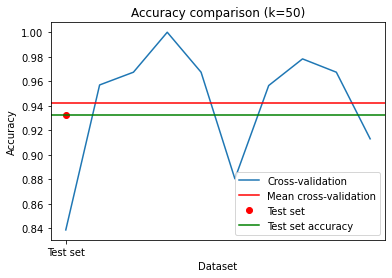

In [68]:


# Plot the results
plt.bar(range(len(scores)), scores)
plt.axhline(y=scores.mean(), color='r', linestyle='-')
plt.xticks(range(len(scores)))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation accuracy (k=50)')
plt.show()

plt.bar(['Test set'], [accuracy])
plt.axhline(y=scores.mean(), color='r', linestyle='-')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Test set accuracy (k=50)')
plt.show()


plt.plot(range(len(scores)), scores, label='Cross-validation')
plt.axhline(y=scores.mean(), color='r', linestyle='-', label='Mean cross-validation')
plt.plot(['Test set'], [accuracy], 'ro', label='Test set')
plt.axhline(y=accuracy, color='g', linestyle='-', label='Test set accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison (k=50)')
plt.legend()
plt.show()

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Accuracy for each fold:  [0.83870968 0.95698925 0.9673913  1.         0.9673913  0.88043478
 0.95652174 0.97826087 0.9673913  0.92391304]
Mean accuracy:  0.943700327255727


C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

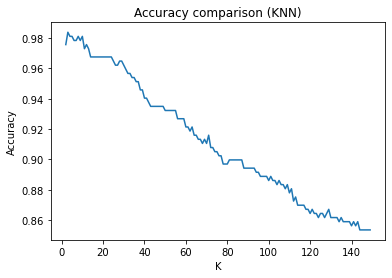

Best value of k: 3


In [79]:


X = df.iloc[:, :-1]
y = df.iloc[:,[-1]]


# Use cross-validation to create test and train data
scores = cross_val_score(knn, X, y, cv=10)
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", scores.mean())


# Split the data into training and test sets with a test size of 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# Create a list of K values to test
k_values = range(2, 150)

# Create an empty list to store the accuracies for each K value
accuracies = []

# Test the KNN classifier with each K value and store the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison (KNN)')
plt.show()

# Find the best value of K
best_k = k_values[accuracies.index(max(accuracies))]
print('Best value of k:', best_k)
